## FNCE30012: Foundations of Fintech - Assignment 5
This assignment builds on Lectures 10 to 12 and on Tutorials 8 to 11. You might want to consider using parts of the Python code discussed in those tutorials to answer some of the questions below.

**Important:** It is important that you *do not* change the type (markdown vs. code) of any cell, *nor* copy/paste/duplicate any cell! If the cell type is markdown, you are supposed to write text, not code, and vice versa. Provide your answer to each question in the allocated cell. *Do not* create additional cells. Answers provided in any other cell will **not** be marked. *Do not* rename the assignment files. All files in the assignment directory should be left as is.

### Setting
Equifax Australia has provided us with synthetic loan application data from Australian proprietary companies. This data was generated to match the characteristics of *actual* lending proposals approved between February 2017 and March 2018. The Equifax data consists of two parts, which, to make it easier for you, we have merged together into one data set:

1. Company Business Trading History Data: This first part of the data set contains historical business trading data from 25,000 Australian proprietary companies who were granted a loan between February 2017 and March 2018.
2. Director Data: This second part of the data set contains information on up to four directors of each company. In case a company has more than one director, the corresponding data has been averaged across directors at the company level.


Since this is proprietary data that belongs to Equifax, we are not allowed to give you direct access to it. However, thanks to Jupyter Hub, you are able to access it remotely. In particular, using your knowledge from Tutorial 9, you are able to analyse it at an aggregate level and to use it for the estimation of credit scoring models.

The file called `Equifax_Data_Dictionary.xlsx` provides you with the dictionary for both company and director level data.

#### Helpful commands
The merged Equifax dataset will be referred to by the name `assignment5`. Please see Tutorial 9 for the details of how to run functions on remote data. We have implemented additional functions to help you with this assignment. Details of these functions are below:

1. `send_grouped_mean_request()`: This function takes inputs in the form of a dictionary containing names of two columns, and returns a Pandas dataframe that contains grouped means of a column with respect to another column. For example, using this function with input `{"data": "tutorial9.1","var": "age", "y": "SeriousDlqin2yrs"}` will return a dataframe where each entry has a value for `age` and the respective mean of `SeriousDlqin2yrs` for applicants' of that age (see Tutorial 10).
2. `send_glm_request()`: This function takes inputs in the form of a reference to the remote data ("data") and the dependent variable ("y"), i.e., `{"data": data, "y": y}`, and outputs the detailed results of a full-fledged logistic regression model without feature selection.
3. `send_logit_request()`: This function is similar to the `send_nn_request()` method, but it performs the remote estimation of a customised logistic regression. It takes inputs in the form of a dictionary `{"data": data, "test": 0.2, "x": features, "y": y, "scale":"True"}` where:
       a. "data": Reference to the remote data (see below)
       b. "test": Fraction of the data used for testing
       c. "x": List of features (independent variables) used by the model
       d. "y": Target variable (dependent variable) of the model
       e. "scale": Indicator ("True"/"False") for scaling


#### Predefined variables
For your convenience, we have predefined certain variables which you should reuse for this assignment:
1. `data`: The remote Equifax dataset that should be used in this assignment
2. `target`: The target variable (default indicator over 12 months)
3. `all_features`: The complete list of available features

**Note:** Please do not change the values of these variables.

In [46]:
# the merged Equifax dataset
data = "assignment5"

# the target (dependent) variable of interst (good/bad flag): 0 means no default within 12 months / 1 means default
target = 'Commercial_GBF_12m'

# the complete list of available features as of the loan approval date (see Equifax_Data_Dictionary.xlsx for details)
all_features = ['EFX_Comp_ID',
 'loanAmt',
 'External_Admin',
 'Petitions',
 'Writs_and_Summons',
 'Writs_and_Summons_Value',
 'Writs_and_Summons_LT_12M',
 'Writs_and_Summons_LT_12M_Value',
 'Writs_and_Summons_GT_12M',
 'Writs_and_Summons_GT_12M_Value',
 'Judgements',
 'Judgements_Value',
 'Judgements_LT_12M',
 'Judgements_LT_12M_Value',
 'Judgements_GT_12M',
 'Judgements_GT_12M_Value',
 'Directors',
 'Defaults',
 'Defaults_Value',
 'Defaults_12',
 'Defaults_12_Value',
 'Defaults_GT_12M',
 'Defaults_GT_12M_Value',
 'Telco_Defaults_LT_12M',
 'Telco_Defaults_LT_12M_Value',
 'Utility_Defaults_LT_12M',
 'Other_Defaults_LT_12M',
 'Other_Defaults_LT_12M_Value',
 'Defaults_Paid',
 'Defaults_Paid_Value',
 'Defaults_Unpaid',
 'Defaults_Unpaid_Value',
 'Credit_Enqry',
 'Credit_Enqry_Value',
 'Credit_Enqry_LT_12M',
 'Credit_Enqry_LT_12M_Value',
 'Credit_Enqry_GT_12M',
 'Credit_Enqry_GT_12M_Value',
 'Broker_Enqry',
 'Broker_Enqry_Value',
 'Broker_Enqry_LT_12M',
 'Broker_Enqry_LT_12M_Value',
 'Broker_Enqry_GT_12M',
 'Broker_Enqry_GT_12M_Value',
 'Mercantile_Enqry_LT_12M',
 'Mercantile_Enqry',
 'Mercantile_Enqry_GT_12M',
 'Mercantile_Enqry_GT_12M_Value',
 'ny7513_df_6m',
 'ny7514_df_12m',
 'ny7516_df_60_84m',
 'ny7517_df_tcut_6m',
 'ny7518_df_tcut_12m',
 'ny7520_df_tcut_60_84m',
 'ny7568_df_sts_unpd_60_84m',
 'ny7585_df_origamt_tcut_60_84m',
 'ny7586_df_origamt_60_84m',
 'ny7587_df_latamt_12m',
 'ny7588_df_latamt_60_84m',
 'ny7589_df_time_1',
 'ny7591_df_s_1_60_84m',
 'ny7601_adv_48_84m',
 'ny7999_enq_7d',
 'ny8000_enq_1m',
 'ny8001_enq_3m',
 'ny8002_enq_6m',
 'ny8003_enq_12m',
 'ny8006_enq_60m',
 'ny8028_enq_rm_1m',
 'ny8029_enq_rm_3m',
 'ny8030_enq_rm_6m',
 'ny8031_enq_rm_12m',
 'ny8034_enq_rm_60m',
 'ny8042_enq_tcut_1m',
 'ny8043_enq_tcut_3m',
 'ny8044_enq_tcut_6m',
 'ny8045_enq_tcut_12m',
 'ny8048_enq_tcut_60m',
 'ny8049_enq_own_3m',
 'ny8050_enq_own_12m',
 'ny8056_enq_amt_1',
 'ny8057_enq_amt_2',
 'ny8059_enq_time_1',
 'ny8060_enq_time_2',
 'ny8062_enq_amt_3m',
 'ny8063_enq_amt_60m',
 'np7504_dj_60m',
 'np7505_dj_time_1',
 'np7506_dj_out_amt_60m',
 'np7508_dj_out_60m',
 'np7509_wr_48m',
 'np7510_wr_out_48m',
 'np7511_wr_60m',
 'np7512_wr_out_60m',
 'np8500_dr_cur',
 'np8501_dr_time_max_cur',
 'np8502_dr_prev_60m',
 'np8508_pr_cur',
 'np8509_dr_prev_120m_ever',
 'na8905_ntb_flg',
 'na8902_age_fle_max',
 'na8904_age_fle',
 'na8908_age_ind',
 'na8920_em_time_1',
 'na8921_ad_time_1',
 'ny8056_enq_amt_1_is_1']

Please run the following cell to import the required libraries.

In [47]:
# Usual imports
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Essential libraries for this assignment
from finml import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib inline
import nest_asyncio
from tfclient import send_nn_request, send_logit_request, send_glm_request, send_grouped_mean_request
nest_asyncio.apply()

# Suppress warnings for deprecated methods from TensorFlow
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In your assessment, please address the following questions.

### Question 1 (2 marks)
Write a Python code that creates two bar plots of average default rates (`Commercial_GBF_12m`) depending on (i) whether a company was under external administration (`External_Admin`) or (ii) had filed [petitions](https://www.thegazette.co.uk/all-notices/content/101087) (`Petitions`). Make sure your plots' axes are appropriately labelled.

### Answer 1

Image(value=b'GIF89aP\x00P\x00\xf7\x00\x00\x00\x00\x00\x01\x01\x01\x02\x02\x02\x10\x03\x08\x1d\x04\r5\x06\x16I…

Image(value=b'GIF89aP\x00P\x00\xf7\x00\x00\x00\x00\x00\x01\x01\x01\x02\x02\x02\x10\x03\x08\x1d\x04\r5\x06\x16I…

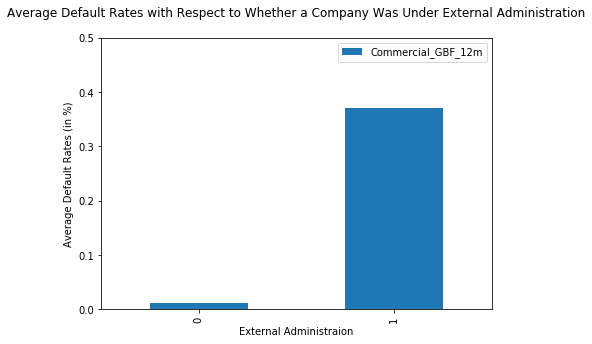

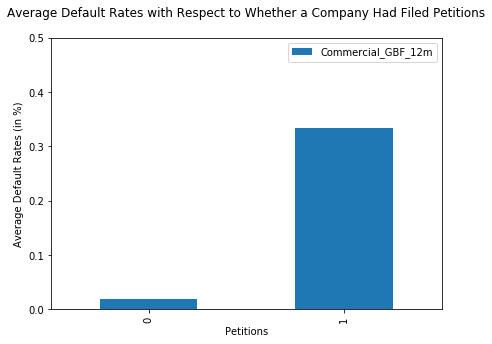

In [48]:
# compute the grouped mean of average default rates on External_Admin and save it as a variable
grouped_exAdmin = send_grouped_mean_request({"data": data,"var": "External_Admin"  , "y": target})

# compute the grouped mean of average default rates on Petitions and save it as a variable
grouped_Petitions = send_grouped_mean_request({"data": data,"var": "Petitions" , "y": target})

# plot the grouped mean
ax = grouped_exAdmin.plot.bar(
    figsize=(7, 5),
    title='Average Default Rates with Respect to Whether a Company Was Under External Administration\n',
    xlim=(0, 1),
    ylim=(0, 0.5),
)
ax.set_xlabel("External Administraion")
ax.set_ylabel("Average Default Rates (in %)");

bx = grouped_Petitions.plot.bar(
    figsize=(7, 5),
    title='Average Default Rates with Respect to Whether a Company Had Filed Petitions\n',
    xlim=(0, 1),
    ylim=(0, 0.5),
)
bx.set_xlabel("Petitions")
bx.set_ylabel("Average Default Rates (in %)");


### Question 2 (2 marks)
Write a Python code that creates two plots of average default rates (`Commercial_GBF_12m`) as a function of (i) the number of months since a director's last commercial default (`ny7589_df_time_1`) and (ii) the frequency of adverse commercial events over four years 48 months prior to application (`ny7601_adv_48_84m`). Make sure your plots' axes are appropriately labelled.

### Answer 2

Image(value=b'GIF89aP\x00P\x00\xf7\x00\x00\x00\x00\x00\x01\x01\x01\x02\x02\x02\x10\x03\x08\x1d\x04\r5\x06\x16I…

Image(value=b'GIF89aP\x00P\x00\xf7\x00\x00\x00\x00\x00\x01\x01\x01\x02\x02\x02\x10\x03\x08\x1d\x04\r5\x06\x16I…

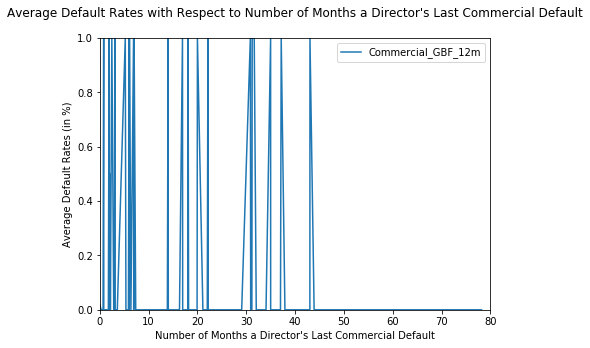

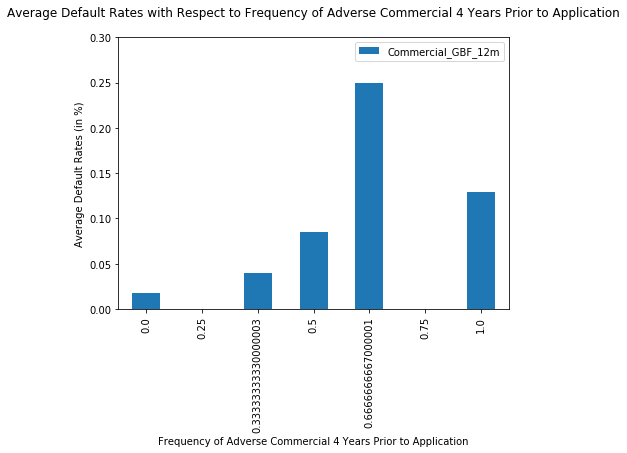

In [49]:
# compute the grouped mean of average default rates on number of months a director's last commercial default and save it as a variable
grouped_MonthsAfter = send_grouped_mean_request({"data": data,"var": "ny7589_df_time_1", "y": target})

# compute the grouped mean of average default rates on the frequency of adverse commercial events over 4 years prior to application and save it as a variable
grouped_FreqAdComm = send_grouped_mean_request({"data": data,"var": "ny7601_adv_48_84m", "y": target})

# plot the grouped mean
ax = grouped_MonthsAfter.plot(
    figsize=(7, 5),
    title="Average Default Rates with Respect to Number of Months a Director's Last Commercial Default\n",
    xlim=(0, 80),
    ylim=(0, 1),
)
ax.set_xlabel("Number of Months a Director's Last Commercial Default")
ax.set_ylabel("Average Default Rates (in %)");

bx = grouped_FreqAdComm.plot.bar(
    figsize=(7, 5),
    title='Average Default Rates with Respect to Frequency of Adverse Commercial 4 Years Prior to Application\n',
    xlim=(0, 1),
    ylim=(0, 0.3),
)
bx.set_xlabel("Frequency of Adverse Commercial 4 Years Prior to Application")
bx.set_ylabel("Average Default Rates (in %)");


### Question 3 (1 mark)
How do you interpret the above plots from Questions 1 and 2? What is your conclusion?

### Answer 3

1. A company that was under external administration and had filed petitions have higher default rates on average. This makes sense as the a company with external administration conveys that the firm is insolvent, thus showing more troubles with paying loans back compared to that without external administration. Petitions also signal that firms are incapable of paying their loans back as a winding up petition is done by creditors when firms are owing them money.


2. The less number of months (more recent, up to around 40 months) since the last commercial dafult seems to lead to a more likelihood of default as shown by the line graph. This can show incapability of a director to manage a firm. From the second plot, we can conclude that the more frequent adverse commercial events over 4 years, the more likely a firm would default (the average default rates are higher when the frequency is half or higher). The adverse events may have highlighted events concerning insolvency.


### Question 4 (2 marks)
Run a full-fledged logistic regression model without any ex-ante feature selection. Based on the estimation output, select and report all features that are significant at the 5%-level (or below).

**Note:** To increase the stability of the estimation, Python will automatically omit certain variables.

### Answer 4 - Code

In [50]:
#Setting parameters
params = {"data": data, "y": target}

#Creating logistic regression model 
send_glm_request(params)

Image(value=b'GIF89aP\x00P\x00\xf7\x00\x00\x00\x00\x00\x01\x01\x01\x02\x02\x02\x10\x03\x08\x1d\x04\r5\x06\x16I…

Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                25000
Model:                            GLM   Df Residuals:                    24906
Model Family:                Binomial   Df Model:                           93
Link Function:                  logit   Scale:                          1.0000
Method:                            nm   Log-Likelihood:                -1729.5
Date:                Wed, 06 Nov 2019   Deviance:                       3459.1
Time:                        23:33:42   Pearson chi2:                 1.55e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                    

(None, None, {}, {})

### Answer 4 - Text

Features that are significant at the 5% level:
- External_Admin (0.000)
- Petitions (0.004)
- ny7589_df_time_1 (0.020)
- ny7601_adv_48_84m (0.027)


### Question 5 (3 marks)
Run a logit model using the function `send_logit_request()` and applying the following specifications:
1. Relative size of test data: 20%
2. Only use the features from Question 4 with a significance level below 5%
3. Scaling: "True"

Evaluate the testing performance of your logit model.

### Answer 5 - Code

In [51]:
#Set features
features = ['External_Admin', 'Petitions', 'ny7589_df_time_1', 'ny7601_adv_48_84m']

#Set parameters
params = {"data": data, "test": 0.2, "x": features, "y": target, "scale":"True"}

#Create model and evaluate
send_logit_request(params) 
    

Image(value=b'GIF89aP\x00P\x00\xf7\x00\x00\x00\x00\x00\x01\x01\x01\x02\x02\x02\x10\x03\x08\x1d\x04\r5\x06\x16I…

########################################
############## Test Set: ###############
########################################
Precision:  0.875
Recall:  0.0660377358490566
Accuracy Score:  0.98
roc_auc:  0.7267582176095488
Confusion matrix: 
[[4893    1]
 [  99    7]]

########################################
############## Train Set: ##############
########################################
Precision:  0.5
Recall:  0.03324808184143223
Accuracy Score:  0.98045
roc_auc:  0.7317614347710008
Confusion matrix: 
[[19596    13]
 [  378    13]]


({'accuracy': 0.98045,
  'precision': 0.5,
  'recall': 0.03324808184143223,
  'roc': 0.7317614347710008},
 {'accuracy': 0.98,
  'precision': 0.875,
  'recall': 0.0660377358490566,
  'roc': 0.7267582176095488})

### Answer 5 - Text

The model has high train and test accuracy, however, this measure is somewhat misleading as accuracy is the proportion of correct classification. This data set is distributed in a way that thare is clearly more non defaults (0) than defaults (1). Hence, more likely for the model to correctly predict non defaults, 0s. Precision, on the other hand, is high on the test set (0.875) and exactly half on the training set. This is a better reflection of the model as it shows proportion of correctly predicted defaults. This shows misopportunities (false positives) of firms that actually will not default. This neglects all the non defaults. Precision is calculated only from the number of predicted defaults and the total for both training and testing set is pretty low. Hence, precision is also not a proper measure of a good fitting model in this context. On the other hand, recall is another performance measure that is  shown by the function and this shows how good the model is at identifying defaults. Recall takes into account false negatives, the number of wrongly predicted non defaults. This is one of the most important measure as it highlights the correct default predicitions as false negatives are costly (firms defaulting in the end). Recall for both training and testing set are low as both are below 0.1. This is again caused by the distribution of the dataset that includes many more non defaults compared to defaults. ROC AUC, the degree of discrimination, shows how well the model can differentiate between default and non default. This is really important and both training and testing set ROC AUC values are pretty high at 0.7318 and 0.768 respectively.

### Question 6 (4 marks)
Write a Python code that estimates a series of full-fledged neural networks with the following specifications:
1. Number of layers: 1
2. Number of units: 2, 4, 16, 64, 256
3. Relative size of test data: 20%
4. Scaling: "True"

Generate one plot that shows each model's ROC ("roc"), both for testing and training. What is your conclusion?

### Answer 6 - Code

Image(value=b'GIF89aP\x00P\x00\xf7\x00\x00\x00\x00\x00\x01\x01\x01\x02\x02\x02\x10\x03\x08\x1d\x04\r5\x06\x16I…

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 214       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/1000
20000/20000 - 1s - loss: 0.7351 - acc: 0.5962 - val_loss: 0.6618 - val_acc: 0.9020
Epoch 2/1000
20000/20000 - 0s - loss: 0.6101 - acc: 0.9492 - val_loss: 0.5728 - val_acc: 0.9726
Epoch 3/1000
20000/20000 - 0s - loss: 0.5408 - acc: 0.9762 - val_loss: 0.5135 - val_acc: 0.9760
Epoch 4/1000
20000/20000 - 0s - loss: 0.4869 - acc: 0.9784 - val_loss: 0.4635 - val_acc: 0.9770
Epoch 5/1000
20000/20000 - 0s - loss: 0.4406 - acc: 0.9793 - val_loss: 0.4205 - val_acc

Image(value=b'GIF89aP\x00P\x00\xf7\x00\x00\x00\x00\x00\x01\x01\x01\x02\x02\x02\x10\x03\x08\x1d\x04\r5\x06\x16I…

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 428       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/1000
20000/20000 - 1s - loss: 0.6384 - acc: 0.7294 - val_loss: 0.4435 - val_acc: 0.9612
Epoch 2/1000
20000/20000 - 0s - loss: 0.4196 - acc: 0.9719 - val_loss: 0.2868 - val_acc: 0.9758
Epoch 3/1000
20000/20000 - 0s - loss: 0.2592 - acc: 0.9786 - val_loss: 0.1693 - val_acc: 0.9766
Epoch 4/1000
20000/20000 - 0s - loss: 0.1572 - acc: 0.9793 - val_loss: 0.1303 - val_acc: 0.9770
Epoch 5/1000
20000/20000 - 0s - loss: 0.1238 - acc: 0.9796 - val_loss: 0.1144 - val_acc

Image(value=b'GIF89aP\x00P\x00\xf7\x00\x00\x00\x00\x00\x01\x01\x01\x02\x02\x02\x10\x03\x08\x1d\x04\r5\x06\x16I…

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                1712      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/1000
20000/20000 - 1s - loss: 0.3137 - acc: 0.9572 - val_loss: 0.1411 - val_acc: 0.9782
Epoch 2/1000
20000/20000 - 0s - loss: 0.1135 - acc: 0.9796 - val_loss: 0.0900 - val_acc: 0.9796
Epoch 3/1000
20000/20000 - 0s - loss: 0.0860 - acc: 0.9799 - val_loss: 0.0813 - val_acc: 0.9804
Epoch 4/1000
20000/20000 - 0s - loss: 0.0777 - acc: 0.9808 - val_loss: 0.0783 - val_acc: 0.9804
Epoch 5/1000
20000/20000 - 0s - loss: 0.0737 - acc: 0.9811 - val_loss: 0.0789 - val

Image(value=b'GIF89aP\x00P\x00\xf7\x00\x00\x00\x00\x00\x01\x01\x01\x02\x02\x02\x10\x03\x08\x1d\x04\r5\x06\x16I…

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                6848      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 6,913
Trainable params: 6,913
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/1000
20000/20000 - 1s - loss: 0.1809 - acc: 0.9706 - val_loss: 0.0865 - val_acc: 0.9796
Epoch 2/1000
20000/20000 - 1s - loss: 0.0806 - acc: 0.9804 - val_loss: 0.0801 - val_acc: 0.9788
Epoch 3/1000
20000/20000 - 1s - loss: 0.0727 - acc: 0.9811 - val_loss: 0.0806 - val_acc: 0.9790
Epoch 4/1000
20000/20000 - 1s - loss: 0.0699 - acc: 0.9815 - val_loss: 0.0798 - val_acc: 0.9804
Epoch 5/1000
20000/20000 - 1s - loss: 0.0674 - acc: 0.9825 - val_loss: 0.0826 - val

Image(value=b'GIF89aP\x00P\x00\xf7\x00\x00\x00\x00\x00\x01\x01\x01\x02\x02\x02\x10\x03\x08\x1d\x04\r5\x06\x16I…

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               27392     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 27,649
Trainable params: 27,649
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/1000
20000/20000 - 1s - loss: 0.1408 - acc: 0.9729 - val_loss: 0.0804 - val_acc: 0.9800
Epoch 2/1000
20000/20000 - 1s - loss: 0.0750 - acc: 0.9809 - val_loss: 0.0819 - val_acc: 0.9796
Epoch 3/1000
20000/20000 - 1s - loss: 0.0696 - acc: 0.9816 - val_loss: 0.0837 - val_acc: 0.9800
Training Completed
########################################
############## Test Set: ###############
########################################
Precision:  0.59375
Recall:  0.1792

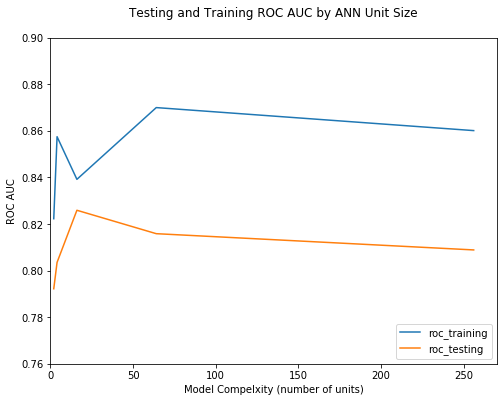

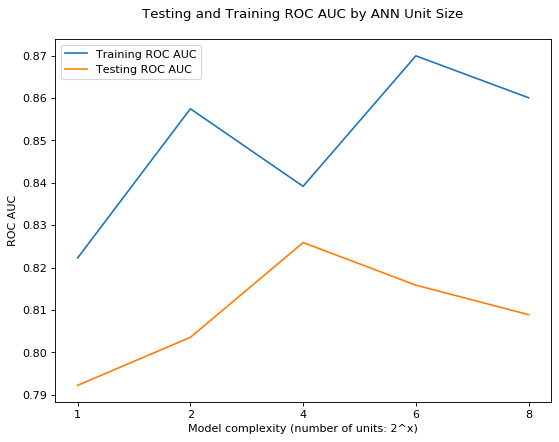

In [52]:
#Define lists of the different units, training ROC and testing ROC
unit = (2, 4, 16, 64, 256)
roc_training =[None for _ in range(5)]
roc_testing =[None for _ in range(5)]

#Create a loop to go over the ANN with different unit values and filling the emppty lists with values from the metrics
for i in range(5):
    params = {'data': data, "layers": 1, "units": unit[i], "test": 0.2, "x": all_features, "y": target, 'scale':'True'}
    model, scaler, training_metrics, testing_metrics = send_nn_request(params)
    roc_training[i] = training_metrics['roc'] 
    roc_testing[i] = testing_metrics['roc']
    
#Checking by printing both training and testing ROCs    
print(roc_training)
print(roc_testing)

#Creating a dataframe consisting the required series for the plot
df = pd.DataFrame(list(zip(roc_training, roc_testing)), 
            columns = ['roc_training', 'roc_testing'],
            index = unit) 

#Plotting 2 graphs with different x axis scaling
# 1. Plot the created dataframe while changing the parameters of the diagram
cx = df.plot(
    figsize=(8, 6),
    title='Testing and Training ROC AUC by ANN Unit Size\n',
    xlim=(0, 270),
    ylim=(0.76, 0.9),
    )

cx.legend(loc='lower right')
cx.set_xlabel("Model Compelxity (number of units)")
cx.set_ylabel("ROC AUC");


# 2. plot the training and testing roc auc as a function of #units
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(roc_training, label="Training ROC AUC")
plt.plot(roc_testing, label="Testing ROC AUC")
plt.xlabel("Model complexity (number of units: 2^x)")
plt.xticks(np.arange(0, 5, step=1), (1, 2, 4, 6, 8))
plt.ylabel("ROC AUC")
plt.title("Testing and Training ROC AUC by ANN Unit Size\n")
plt.legend();


### Answer 6 - Text

Holding everything else constant, it seems that the model with the highest ROC AUC value in the testing set is the model with 1 hidden layer and 16 units. This is not true for the training set in which ROC AUC value peaks when unit is 64. The graph suggests that after the peak, the values of ROC AUC for both training and testing set seem to be decreasing as the model gets more complex with more number of units. This makes sense as a more complex model would  lead to an overfit. The model would then loses its power of predicting an unkown set of data. Before their apex, there is no clear trend for the training set. ROC AUC value generally increases for the training set, while fluctuating as it drops when number of unit is 16. However, for the testing set, ROC AUC generally increases until it reaches the peak. 


### Question 7 (2 marks)
Based on the testing performance of the above five neural network model, which one would you pick and why? Rerun the estimation of your chosen model.

### Answer 7 - Text

Test Set performances are presented in this table below.

| Num. Layers  | Num. Units           | Precision  | Recall | Accuracy | ROC AUC |
| --------- |:---------:| -----:| -----:| -----:| -----:|
| 1 | 2 | 0.65 | 0.1226 | 0.98 | 0.7922 |
| 1 | 4 | 0.5385 | 0.1321 | 0.9792 | 0.8035 |
| 1 | 16 | 0.75 | 0.1981 | 0.9816 | 0.8259 |
| 1 | 64 | 0.5 | 0.1604 | 0.9788 | 0.8158 |
| 1 | 256 | 0.5938 | 0.1792 | 0.98 | 0.8089 |


I will choose the model with 1 hidden layer and 16 units as not only that it has the highest performance, according to the usual performance measures (Precision, Recall, and Accuracy), but also the highest ROC AUC (the measure of discrimination). The confusion matrix also shows that this model predicts a healthy amount of defaults (postives). This also hints that the model is not a result of an overfit of the training set.


### Answer 7 - Code

In [53]:
#Set parameters
params = {'data': data, "layers": 1, "units": 16, "test": 0.2, "x": all_features, "y": target, 'scale':'True'}

#Build model 
model, scaler, training_metrics, testing_metrics = send_nn_request(params)

Image(value=b'GIF89aP\x00P\x00\xf7\x00\x00\x00\x00\x00\x01\x01\x01\x02\x02\x02\x10\x03\x08\x1d\x04\r5\x06\x16I…

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                1712      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/1000
20000/20000 - 1s - loss: 0.3137 - acc: 0.9572 - val_loss: 0.1411 - val_acc: 0.9782
Epoch 2/1000
20000/20000 - 0s - loss: 0.1135 - acc: 0.9796 - val_loss: 0.0900 - val_acc: 0.9796
Epoch 3/1000
20000/20000 - 0s - loss: 0.0860 - acc: 0.9799 - val_loss: 0.0813 - val_acc: 0.9804
Epoch 4/1000
20000/20000 - 0s - loss: 0.0777 - acc: 0.9808 - val_loss: 0.0783 - val_acc: 0.9804
Epoch 5/1000
20000/20000 - 0s - loss: 0.0737 - acc: 0.9811 - val_loss: 0.0789 - val

### Question 8 (3 marks)
Conduct an in-depth comparison between the "simple" logit model (Question 5) and your preferred neural network (Question 7). What are their respective potential advantages and disadvantages? If you were to run a credit scoring agency, which type of model you think your clients would prefer?

### Answer 8

Comparison between both models

Logit: 
- pros:
    - Simpler model with only 4 features
    - Lower computing power, more efficient
    - Easier to interpret 
    - Less prone to overfit


- cons:
    - May not be able to explain complex combinations 
    - Can lead to an overfit quickly with more features
    - Feature selection is an extra step to create a good fitting model 
    - Statistical knowledge is required and can benefit model building process 

Neural Network: 
- pros:
    - Can handle complex combinations 
    - Simple to operate compared to a logit model with feature selection 
    - Can include large number of features without transforming the dataset
    
- cons: 
    - Is a "blackbox" as it is hard to understand intuitively how features interact with each other
    - Computationally expensive
    - No ways to properly construct the perfect/ optimum model 
    - More prone to overfitting (from changing the numbers of hidden layers and units)

Test set performances are presented in this table below.

| Model          | Precision  | Recall | Accuracy | ROC AUC |
|:---------:| -----:| -----:| -----:| -----:|
| Neural Network | 0.7500 | 0.1981 | 0.9816 | 0.8259 |
| Logit | 0.875 | 0.0660 | 0.9800 | 0.7268 |

From the test performances, we can see that the Neural Network has more discriminative power compared to that of the logit model as highlighted by the higher ROC AUC value (0.825>0.7268). This is highlighting the result of using a more complex model that utilises all the features available compared to that of only 4 from the logit model. It seems that in this context, the neural network gives the better model as it is most important for the model to be able to differentiate between defaults and non defaults correctly. The Neural Network model has better accuracy and recall too. The logit model does have a higher precision. This is due to it only resulting in 1 false positive relative to all 8 predicted defaults. This is better than 7 false positives relative to 28 predicted defaults from the Neural Network model. The logit model is somwhat better at correctly predicting defaults relative to the total default prediction. This measure is not that important comparead to recall as recall takes into account the false negatives that are costly to lending agencies (firms who would have defaulted).

This can be seen from the testing set confusion matrix:

Logit Model:
- True Negatives = 4893   
- True Positives = 7
- False Negatives = 99
- False Positives = 1

Neural Network Model:
- True Negatives = 4887
- True Positives = 21
- False Negatives = 85
- False Positives = 7

Clients would prefer the model that not only would properly distinguish default, but also would maximise their net revenue by giving out loans to firms that will not default. The most loss will occur from firms that will default, thus highlighted by the relative number of false negatives (Neural Network has lower number than Logit). From the testing confusion matrix and the performance measures, the Neural Network has a better performance compared to that of a simple logit model. Hence, clents would prefer the Neural Network model.



### Question 9 (3 marks)
The average loan amount across the Equifax sample is $75,000. Furthermore, let us make the following simplifying assumptions:
1. The interest rate charged for each loan under the simple logit model (Question 5) is 5% p.a.
2. Each loan has a duration of one year
3. If a loan defaults, the total amount is lost (zero recovery) and no interest payments occur
4. A loan application only gets granted, if the respective model predicts no default
5. Each granted loan generates administrative costs of 1% p.a.

You are running a business that lends loans of $75,000 to small companies. Based on the above **testing data**, what is the interest rate implied by your chosen neural network (Question 7), such that you will generate the same net income as under the simple logit model?

**Note:** For your calculations, you can neglect any time value of money effects.

### Answer 9

Utilise the testing set confusion matrix:

Logit Model:
- True Negatives = 4893   
- True Positives = 7
- False Negatives = 99
- False Positives = 1

Neural Network Model:
- True Negatives = 4887
- True Positives = 21
- False Negatives = 85
- False Positives = 7

First, find the likelihood of firms actually paying back the loans by looking at the proportion of True Negatives over all the Predicted Negatives.

For Logit Model,
- 4893 /(4893+99) = 0.98016

For NN Model,
- 4887 / (4887+85) = 0.982904

The propportion of False Negatives is also important as it depicts losses.

For Logit Model,
- 99 /(4893+99) = 0.01983

For NN Model,
- 85 / (4887+85) = 0.017096

We know that the logit model interest rate is 5% p.a. From all the information give, we can calculate the net income of the logit model. It is calculated as follow.

(0.98016) x 5% x 75000 + 100% x 1% x 75000 - (0.01983) x 75000 = $ 2938.35

As we assume that net income for both models are the same, we can continue to calculate the interest rate for neural network model such that,

Interest rate (Neural Net) = (2938.35 + ((0.017096) x 75000) - (100% x 1% x 75000)) x (100 / (0.982904 x 75000) = 4.707886 % 

### Question 10 (1 mark)
When you go through the dictionary provided in the file `Equifax_Data_Dictionary.xlsx`, you will notice that Equifax uses primarily legal data rather than accounting data to predict defaults. Why do you think that is?

### Answer 10

Legal data provides a better reflection of likelihood of defaulting in the future as it keeps track of a firm's compliance to obligations and other legal circumstances; unlike accounting data that highlights the flow of money only. Legal data is a collection of facts that cannot be altered by the firms themselves. This is different to accounting data. This type of data can be altered by the firms as acts of earnings management. With legal data, information is clear and true and not prone to manipulation as firms that have defaulted before or were insolvent would produce some sort of legal data.



### Question 11 (2 marks)
Discuss the pros and cons of using deep learning, i.e., hierarchical machine learning applied to big data, in the context of credit scoring.

### Answer 11

One of the most obvious advantages of utilising deep learning is the performance of the model, especially by its ability to include lots of features compared to that of other simpler models such as a simple Logit model. This is a huge advantage so that the credit scoring agency can actually provide more inputs to actually further improve the model without any transformation beforehand. The improvements would be conveyed by the performance measures, especially the model's ability of discriminating future defaults. However, The performance can be costly as one of the problems of using deep learning is the model's inability to properly give an explanation of its outputs. A deep learning based model is considered as a 'black-box' as users do not know exactly how the computer actually process the inputs. This would hinder the credit scoring agency from giving a sound explanation of the reason behind the predicted output. Another advantage of utilising deep learning is efficiency. A firm that would like to have its credit score would just provide the needed information and anyone can just run the model with the infromation as the input. The output would be the credit score (can be binary as shown in this assignment). Efficiency is how quickly deep learning can be used to properly come up with an output. This is really beneficial to the credit scoring agency as it would save time and aid employees who work on credit scoring. Another limitation of utilising deep learning in this context is its model's inability to actually highlight the best model. Unlike a basic linear regressoin, there is no method such as Ordinary Least Squares to actually maximise a model's performance in deep learning based models. Changing complexity on an Artifiical Netural Network can be done by changing the hidden layers and units, but there is no metric to properly convey the best combinations. Hence, for a credit scoring agency, there is a dilemma in which model to use and how consistent the model can be in the long run. It is important that different firms are scored using similar models as a completely different model can lead to a different credit score. 

